In [2]:
import numpy as np
import matplotlib.pyplot as plt

from bar_parallax_analytic_model import bar_parallax3D, bar_parallax1D

# We can test with different bar structure parameters
custom_params = {
    'sigma_x': 0.67,  # Longer bar major axis
    'sigma_y': 0.29,  # Shorter bar minor axis
    'sigma_z': 0.27,  # Thinner bar vertically
    'r_E': 8.2,       # Closer bar center
    's_max': 15.0,     # Max distance from us for averaging
    #'epsrel': 1e-6    # Relative error tolerance for integration
}


# Define parameter ranges
l_range = np.arange(-15, 16, 1)  # Galactic longitude from -15 to +15 degrees
bar_angles = [0, 15, 20, 25, 29.4, 35, 40, 45, 90]  # Different bar angles to compare
b_values = [-3,-2, -1, -0.5, 0, 0.5, 1, 2, 3]  # different galactic latitudes


In [ ]:
from bar_angle_Synthpop import BarAngleVariationTool
import os

tool = BarAngleVariationTool()

# Parameters
fixed_bar_angle = 25.0  # degrees
fixed_b_deg = -3.0      # degrees
longitude_range = np.arange(-15, 16)  # degrees
solid_angle = 10/3600  # solid angle in deg^2

#takes 19 min to run for 10 arcsec^2 solid angle


/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def sigma_clipped_stats(data, sigma=3):
    from astropy.stats import sigma_clip
    data = np.array(data)
        
    clipped_data = sigma_clip(data, sigma=sigma)
    clipped_mean = np.mean(clipped_data)
    clipped_std_error = np.std(clipped_data) / np.sqrt(len(clipped_data))
    return clipped_mean, clipped_std_error

In [5]:
output_dir = 'TheoreticalBarParallax/'
os.makedirs(output_dir, exist_ok=True)

results = []
for l in longitude_range:
    csv_filename = f'{output_dir}/bar_angle_{fixed_bar_angle:.1f}_l{l:.3f}_b{fixed_b_deg:.3f}.csv'
    catalog, distance_distribution = tool.generate_catalog(
    bar_angle=fixed_bar_angle,
    l_deg=l,
    b_deg=fixed_b_deg,
    solid_angle=solid_angle,
    solid_angle_unit='deg^2'
    )
    
    catalog.to_csv(csv_filename, index=False)
    print(f"    -> Generated and saved catalog with {len(catalog)} stars")
    # Apply filtering criteria 
    mask = (catalog['Dist'] < 30) & (catalog['pop'] == 0) & (catalog['Gaia_G_EDR3'] < 18.5)#population 0: bar stars
    df_filtered = catalog[mask]

    parallax_values = 1.0 / df_filtered['Dist']
    distance_values = df_filtered['Dist']
    
    # Calculate sigma-clipped statistics
    clipped_parallax_mean, clipped_parallax_error = sigma_clipped_stats(parallax_values, sigma=3)
    clipped_distance_mean, clipped_distance_error = sigma_clipped_stats(distance_values, sigma=3)
    results.append({
        'longitude': l,
        'clipped_parallax': clipped_parallax_mean,
        'clipped_parallax_error': clipped_parallax_error,
        'n_stars': len(df_filtered),
        'clipped_distance': clipped_distance_mean,
        'clipped_distance_error': clipped_distance_error
        })


 9664 - Execution Date: 12-12-2025 16:41:12


################################ Settings #################################
 9665 - # reading default parameters from
 9665 - default_config_file =  /opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/config_files/_default.synthpop_conf 
 9666 - # read configuration from 
 9667 - config_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/config_files/huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 9668 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "bar_angle_25.0",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1386613428,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    

    -> Generated and saved catalog with 70332 stars




# Population 1;  halo -----------------------------------------------------
 32622 - # Initialize Population 1 (halo) from 
 32622 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 33074 - # Initialize Population 2 (nsd) from 
 33075 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 33900 - # Initialize Population 3 (thick_disk) from 
 33900 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 34351 - # Initialize Population 4 (thin_disk_1) from 
 34352 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_disk_1.p

    -> Generated and saved catalog with 76741 stars




# Population 1;  halo -----------------------------------------------------
 55029 - # Initialize Population 1 (halo) from 
 55030 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 55504 - # Initialize Population 2 (nsd) from 
 55505 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 56426 - # Initialize Population 3 (thick_disk) from 
 56427 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 56929 - # Initialize Population 4 (thin_disk_1) from 
 56929 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_disk_1.p

    -> Generated and saved catalog with 86129 stars




# Population 1;  halo -----------------------------------------------------
 78467 - # Initialize Population 1 (halo) from 
 78467 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 78920 - # Initialize Population 2 (nsd) from 
 78921 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 79745 - # Initialize Population 3 (thick_disk) from 
 79747 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 80203 - # Initialize Population 4 (thin_disk_1) from 
 80203 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_disk_1.p

    -> Generated and saved catalog with 100418 stars




# Population 1;  halo -----------------------------------------------------
 102233 - # Initialize Population 1 (halo) from 
 102233 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 102724 - # Initialize Population 2 (nsd) from 
 102725 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 103620 - # Initialize Population 3 (thick_disk) from 
 103620 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 104133 - # Initialize Population 4 (thin_disk_1) from 
 104133 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 122800 stars




# Population 1;  halo -----------------------------------------------------
 126578 - # Initialize Population 1 (halo) from 
 126578 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 127027 - # Initialize Population 2 (nsd) from 
 127027 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 127813 - # Initialize Population 3 (thick_disk) from 
 127813 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 128261 - # Initialize Population 4 (thin_disk_1) from 
 128261 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 155829 stars




# Population 1;  halo -----------------------------------------------------
 151813 - # Initialize Population 1 (halo) from 
 151813 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 152266 - # Initialize Population 2 (nsd) from 
 152266 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 153098 - # Initialize Population 3 (thick_disk) from 
 153098 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 153550 - # Initialize Population 4 (thin_disk_1) from 
 153550 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 201619 stars




# Population 1;  halo -----------------------------------------------------
 180318 - # Initialize Population 1 (halo) from 
 180318 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 180771 - # Initialize Population 2 (nsd) from 
 180771 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 181566 - # Initialize Population 3 (thick_disk) from 
 181567 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 182022 - # Initialize Population 4 (thin_disk_1) from 
 182023 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 270709 stars




# Population 1;  halo -----------------------------------------------------
 211536 - # Initialize Population 1 (halo) from 
 211536 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 211987 - # Initialize Population 2 (nsd) from 
 211987 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 212769 - # Initialize Population 3 (thick_disk) from 
 212769 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 213210 - # Initialize Population 4 (thin_disk_1) from 
 213211 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 360935 stars




# Population 1;  halo -----------------------------------------------------
 247344 - # Initialize Population 1 (halo) from 
 247345 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 247795 - # Initialize Population 2 (nsd) from 
 247796 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 248613 - # Initialize Population 3 (thick_disk) from 
 248613 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 249062 - # Initialize Population 4 (thin_disk_1) from 
 249062 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 478179 stars




# Population 1;  halo -----------------------------------------------------
 289514 - # Initialize Population 1 (halo) from 
 289514 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 289974 - # Initialize Population 2 (nsd) from 
 289974 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 290766 - # Initialize Population 3 (thick_disk) from 
 290767 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 291214 - # Initialize Population 4 (thin_disk_1) from 
 291215 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 617594 stars




# Population 1;  halo -----------------------------------------------------
 338444 - # Initialize Population 1 (halo) from 
 338444 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 338892 - # Initialize Population 2 (nsd) from 
 338892 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 339683 - # Initialize Population 3 (thick_disk) from 
 339683 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 340127 - # Initialize Population 4 (thin_disk_1) from 
 340127 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 760781 stars




# Population 1;  halo -----------------------------------------------------
 393409 - # Initialize Population 1 (halo) from 
 393409 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 393851 - # Initialize Population 2 (nsd) from 
 393851 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 394619 - # Initialize Population 3 (thick_disk) from 
 394620 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 395061 - # Initialize Population 4 (thin_disk_1) from 
 395061 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 886927 stars




# Population 1;  halo -----------------------------------------------------
 454988 - # Initialize Population 1 (halo) from 
 454988 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 455431 - # Initialize Population 2 (nsd) from 
 455432 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 456208 - # Initialize Population 3 (thick_disk) from 
 456208 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 456692 - # Initialize Population 4 (thin_disk_1) from 
 456692 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 970304 stars




# Population 1;  halo -----------------------------------------------------
 520468 - # Initialize Population 1 (halo) from 
 520469 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 520916 - # Initialize Population 2 (nsd) from 
 520917 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 521683 - # Initialize Population 3 (thick_disk) from 
 521684 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 522128 - # Initialize Population 4 (thin_disk_1) from 
 522128 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 995471 stars




# Population 1;  halo -----------------------------------------------------
 586781 - # Initialize Population 1 (halo) from 
 586781 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 587356 - # Initialize Population 2 (nsd) from 
 587357 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 588183 - # Initialize Population 3 (thick_disk) from 
 588184 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 588633 - # Initialize Population 4 (thin_disk_1) from 
 588633 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 987774 stars




# Population 1;  halo -----------------------------------------------------
 655079 - # Initialize Population 1 (halo) from 
 655079 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 655562 - # Initialize Population 2 (nsd) from 
 655562 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 656335 - # Initialize Population 3 (thick_disk) from 
 656335 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 656775 - # Initialize Population 4 (thin_disk_1) from 
 656776 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 947179 stars




# Population 1;  halo -----------------------------------------------------
 719288 - # Initialize Population 1 (halo) from 
 719288 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 719735 - # Initialize Population 2 (nsd) from 
 719735 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 720608 - # Initialize Population 3 (thick_disk) from 
 720609 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 721087 - # Initialize Population 4 (thin_disk_1) from 
 721087 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 886575 stars




# Population 1;  halo -----------------------------------------------------
 781950 - # Initialize Population 1 (halo) from 
 781950 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 782393 - # Initialize Population 2 (nsd) from 
 782394 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 783181 - # Initialize Population 3 (thick_disk) from 
 783182 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 783626 - # Initialize Population 4 (thin_disk_1) from 
 783627 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 792157 stars




# Population 1;  halo -----------------------------------------------------
 838196 - # Initialize Population 1 (halo) from 
 838197 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 838642 - # Initialize Population 2 (nsd) from 
 838642 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 839421 - # Initialize Population 3 (thick_disk) from 
 839422 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 839855 - # Initialize Population 4 (thin_disk_1) from 
 839856 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 663776 stars




# Population 1;  halo -----------------------------------------------------
 887955 - # Initialize Population 1 (halo) from 
 887956 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 888394 - # Initialize Population 2 (nsd) from 
 888394 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 889160 - # Initialize Population 3 (thick_disk) from 
 889161 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 889608 - # Initialize Population 4 (thin_disk_1) from 
 889608 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 536010 stars




# Population 1;  halo -----------------------------------------------------
 932120 - # Initialize Population 1 (halo) from 
 932120 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 932594 - # Initialize Population 2 (nsd) from 
 932594 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 933546 - # Initialize Population 3 (thick_disk) from 
 933546 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 934018 - # Initialize Population 4 (thin_disk_1) from 
 934018 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 423684 stars




# Population 1;  halo -----------------------------------------------------
 971428 - # Initialize Population 1 (halo) from 
 971428 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 971868 - # Initialize Population 2 (nsd) from 
 971869 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 972649 - # Initialize Population 3 (thick_disk) from 
 972649 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 973087 - # Initialize Population 4 (thin_disk_1) from 
 973087 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thin_

    -> Generated and saved catalog with 331169 stars




# Population 1;  halo -----------------------------------------------------
 1005225 - # Initialize Population 1 (halo) from 
 1005225 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1005671 - # Initialize Population 2 (nsd) from 
 1005671 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1006446 - # Initialize Population 3 (thick_disk) from 
 1006447 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1006887 - # Initialize Population 4 (thin_disk_1) from 
 1006887 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 262125 stars




# Population 1;  halo -----------------------------------------------------
 1035895 - # Initialize Population 1 (halo) from 
 1035895 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1036354 - # Initialize Population 2 (nsd) from 
 1036354 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1037151 - # Initialize Population 3 (thick_disk) from 
 1037152 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1037602 - # Initialize Population 4 (thin_disk_1) from 
 1037602 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 210007 stars




# Population 1;  halo -----------------------------------------------------
 1064118 - # Initialize Population 1 (halo) from 
 1064119 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1064575 - # Initialize Population 2 (nsd) from 
 1064575 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1065388 - # Initialize Population 3 (thick_disk) from 
 1065389 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1065840 - # Initialize Population 4 (thin_disk_1) from 
 1065840 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 171155 stars




# Population 1;  halo -----------------------------------------------------
 1089848 - # Initialize Population 1 (halo) from 
 1089848 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1090300 - # Initialize Population 2 (nsd) from 
 1090301 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1091071 - # Initialize Population 3 (thick_disk) from 
 1091072 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1091515 - # Initialize Population 4 (thin_disk_1) from 
 1091515 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 143909 stars




# Population 1;  halo -----------------------------------------------------
 1114299 - # Initialize Population 1 (halo) from 
 1114299 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1114740 - # Initialize Population 2 (nsd) from 
 1114741 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1115522 - # Initialize Population 3 (thick_disk) from 
 1115522 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1115972 - # Initialize Population 4 (thin_disk_1) from 
 1115972 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 122210 stars




# Population 1;  halo -----------------------------------------------------
 1137358 - # Initialize Population 1 (halo) from 
 1137358 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1137840 - # Initialize Population 2 (nsd) from 
 1137840 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1138624 - # Initialize Population 3 (thick_disk) from 
 1138625 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1139222 - # Initialize Population 4 (thin_disk_1) from 
 1139222 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 107348 stars




# Population 1;  halo -----------------------------------------------------
 1160141 - # Initialize Population 1 (halo) from 
 1160142 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1160600 - # Initialize Population 2 (nsd) from 
 1160600 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1161406 - # Initialize Population 3 (thick_disk) from 
 1161407 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1161859 - # Initialize Population 4 (thin_disk_1) from 
 1161859 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 94738 stars




# Population 1;  halo -----------------------------------------------------
 1182231 - # Initialize Population 1 (halo) from 
 1182232 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 1182681 - # Initialize Population 2 (nsd) from 
 1182681 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 1183493 - # Initialize Population 3 (thick_disk) from 
 1183494 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 1183944 - # Initialize Population 4 (thin_disk_1) from 
 1183945 - pop_file = '/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/synthpop/models/Huston20

    -> Generated and saved catalog with 86476 stars


/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/numpy/ma/core.py:3463: UserWarning: Warning: converting a masked element to nan.
  _data[indx] = dval
/opt/anaconda3/envs/synthpop/lib/python3.12/site-packages/matplotlib/cbook.py:1355: UserWarning: Warning: converting a masked element to nan.
  return np.asarray(x, float)
/var/folders/8l/p90_cj915l7dtkqz4wc5w59r0000gn/T/ipykernel_11096/1296796280.py:26: RuntimeWarning: divide by zero encountered in divide
  axsec = ax.secondary_yaxis('right', functions=(lambda x: 1/x, lambda x: 1/x))


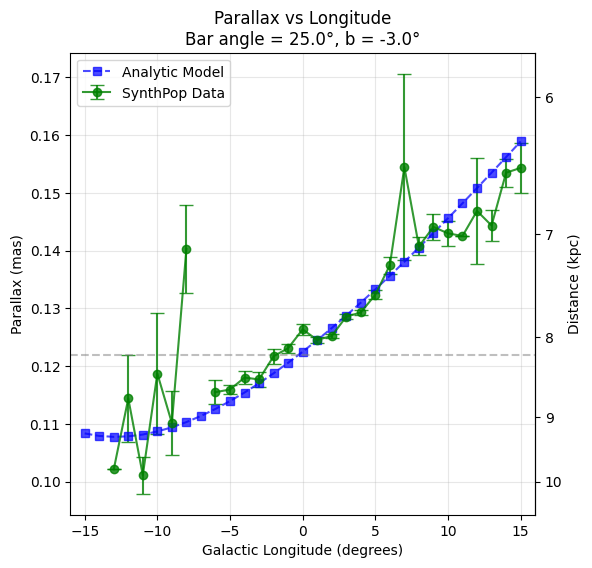

In [6]:
import pandas as pd
results_df = pd.DataFrame(results)

analytic_parallaxes = []
for l in results_df['longitude']:
    #distance = compute_bar_distance(l, fixed_b_deg, fixed_bar_angle, **custom_params)
    parallax = bar_parallax3D(l, fixed_b_deg, fixed_bar_angle, **custom_params)
    analytic_parallaxes.append(parallax)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(results_df['longitude'], results_df['clipped_parallax'], 
            yerr=results_df['clipped_parallax_error'], 
            fmt='o-', color='green', alpha=0.8, label='SynthPop Data', 
            capsize=5, markersize=6)
ax.plot(results_df['longitude'], analytic_parallaxes, 
        's--', color='blue', alpha=0.7, label='Analytic Model', markersize=6)
ax.set_xlabel('Galactic Longitude (degrees)')
ax.set_ylabel(f'Parallax (mas)')
ax.set_title(f'Parallax vs Longitude\nBar angle = {fixed_bar_angle}°, b = {fixed_b_deg}°')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_xlim(-16, 16)
ax.axhline(1/8.2, color='gray', linestyle='--', alpha=0.5)

axsec = ax.secondary_yaxis('right', functions=(lambda x: 1/x, lambda x: 1/x))
axsec.set_ylabel('Distance (kpc)')

#plt.savefig('bar_angle_analytic_model_comparison.pdf', dpi=300)
plt.show()